In [150]:
import requests
import pprint
from bs4 import BeautifulSoup
from selenium import webdriver

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
#my useful info on content structure manually extracted
my_url='https://www.gutenberg.org/browse/languages/fr'
my_text_classes=['pdgbbylanguage']
#my_text_classes=['row-cell shape','row-cell price','row-cell carat','row-cell cut','row-cell color','row-cell clarity','row-cell polish','row-cell symmetry','row-cell fluorescence', 'row-cell depth','row-cell table', 'row-cell lxwratio','row-cell pricepercarat','row-cell culet','row-cell skus','row-cell date']
#my_href_list=['view-btn view-col']

In [3]:
# Create your driver
webdriver_1='C:/Program Files/chromedriver/chromedriver.exe'
driver = webdriver.Chrome(webdriver_1)

# Get a page
driver.get(my_url)

# Feed the source to BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

print(soup.title) 

<title>Browse By Language: French - Project Gutenberg</title>


In [4]:
print(soup.h2.a['name'])
print(soup.h2.a.next_sibling.contents)
print(soup.ul.a['href'])
print(soup.ul.a.string)

a8269
["Abbadie, Arnauld d', 1815-1894?"]
/ebooks/18812
Douze ans de séjour dans la Haute-Éthiopie


In [5]:
my_author_list=[]
for my_element in soup.find_all(["h2","ul"]):
    if str(my_element)[0:4]=='<h2>':
        my_vec=[]
        try:
            my_vec=np.append(my_element.a['name'],my_element.a.next_sibling.contents)
        except:
            continue
    else:    
        for child in my_element.descendants:
            my_vec2=[]
            my_vec3=[]
            try:
                my_vec2=np.append(child.a['href'],child.a.contents)
                my_vec3=np.append(my_vec,my_vec2)
            except:
                continue
            my_author_list.append(my_vec3)

In [6]:
my_author_list=pd.DataFrame(my_author_list)

In [7]:
my_author_list.head(20)

,0,1,2,3,4,5,6,7,8,9
0,a8269,"Abbadie, Arnauld d', 1815-1894?",/ebooks/18812,Douze ans de séjour dans la Haute-Éthiopie,None,None,None,None,None,None
1,a5182,"About, Edmond, 1828-1885",/ebooks/18092,Germaine,None,None,None,None,None,None
2,a5182,"About, Edmond, 1828-1885",/ebooks/22813,Heath's Modern Language Series: La Mère de la ...,None,None,None,None,None,None
3,a5182,"About, Edmond, 1828-1885",/ebooks/13704,L'homme à l'oreille cassée,None,None,None,None,None,None
4,a5182,"About, Edmond, 1828-1885",/ebooks/51709,Le nez d'un notaire,None,None,None,None,None,None
5,a39968,"Abrantès, Laure Junot, duchesse d', 1784-1838",/ebooks/39331,Histoire des salons de Paris (Tome 1/6)\n,[],Tableaux et portraits du grand monde sous Loui...,None,None,None,None
6,a39968,"Abrantès, Laure Junot, duchesse d', 1784-1838",/ebooks/41121,Histoire des salons de Paris (Tome 2/6)\n,[],Tableaux et portraits du grand monde sous Loui...,None,None,None,None
7,a39968,"Abrantès, Laure Junot, duchesse d', 1784-1838",/ebooks/42663,Histoire des salons de Paris (Tome 3/6)\n,[],Tableaux et portraits du grand monde sous Loui...,None,None,None,None
8,a39968,"Abrantès, Laure Junot, duchesse d', 1784-1838",/ebooks/44054,Histoire des salons de Paris (Tome 4/6)\n,[],Tableaux et portraits du grand monde sous Loui...,None,None,None,None
9,a39968,"Abrantès, Laure Junot, duchesse d', 1784-1838",/ebooks/44664,Histoire des salons de Paris (Tome 5/6)\n,[],Tableaux et portraits du grand monde sous Loui...,None,None,None,None


In [8]:
my_author_list.isnull().sum()

0       0
1       0
2       2
3       2
4    3351
5    3351
6    4114
7    4114
8    4116
9    4116
dtype: int64

In [9]:
my_author_list.to_csv('./french_books_list.csv')

In [64]:
french_book_list=pd.read_csv('./french_books_list.csv', index_col=0)

In [116]:
french_book_list.tail(3)

,author_code,ebook_link,ebook_title,other_info,other_info.1,other_info.2,other_info.3,other_info.4,other_info.5,author_Name,author_Surname,author_birth_year,author_death_year
4114,a528,/ebooks/6470,Le Ventre de Paris,NaN,NaN,NaN,NaN,NaN,NaN,Zola,Émile,1840,1902
4115,a528,/ebooks/56808,La vérité en marche: L'affaire Dreyfus,NaN,NaN,NaN,NaN,NaN,NaN,Zola,Émile,1840,1902
4116,a43794,/ebooks/46447,Ma confession,NaN,NaN,NaN,NaN,NaN,NaN,Zoria,NaN,NaN,NaN


In [66]:
my_columns=['author_code','author_info','ebook_link','ebook_title','other_info','other_info','other_info','other_info','other_info','other_info']
french_book_list.columns=my_columns

In [67]:
french_book_list.head(3)

,author_code,author_info,ebook_link,ebook_title,other_info,other_info,other_info,other_info,other_info,other_info
0,a8269,"Abbadie, Arnauld d', 1815-1894?",/ebooks/18812,Douze ans de séjour dans la Haute-Éthiopie,NaN,NaN,NaN,NaN,NaN,NaN
1,a5182,"About, Edmond, 1828-1885",/ebooks/18092,Germaine,NaN,NaN,NaN,NaN,NaN,NaN
2,a5182,"About, Edmond, 1828-1885",/ebooks/22813,Heath's Modern Language Series: La Mère de la ...,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
french_book_list["author_Name"], french_book_list["author_Surname"],french_book_list["author_life_years"] = french_book_list["author_info"].str.split(',', 2).str

In [69]:
french_book_list["author_birth_year"],french_book_list["author_death_year"] = french_book_list["author_life_years"].str.split('-', 1).str

In [71]:
french_book_list=french_book_list.drop(['author_info','author_life_years'],axis=1)

In [72]:
french_book_list.head(3)

,author_code,ebook_link,ebook_title,other_info,other_info,other_info,other_info,other_info,other_info,author_Name,author_Surname,author_birth_year,author_death_year
0,a8269,/ebooks/18812,Douze ans de séjour dans la Haute-Éthiopie,NaN,NaN,NaN,NaN,NaN,NaN,Abbadie,Arnauld d',1815,1894?
1,a5182,/ebooks/18092,Germaine,NaN,NaN,NaN,NaN,NaN,NaN,About,Edmond,1828,1885
2,a5182,/ebooks/22813,Heath's Modern Language Series: La Mère de la ...,NaN,NaN,NaN,NaN,NaN,NaN,About,Edmond,1828,1885


In [73]:
french_book_list.to_csv('./french_books_list_2.csv')

### extract some metrics from the database and clean the database again
- 4117 ebooks
- 1474 authors
- 22 authors have more than 20 books in the database like Sand, Dumas, Verne, Maupassant, Zola, Hugo, Daudet
- authors birth year ranges from 56 to 1954 with a median in 1825
- authors death year ranges from 104 to 1985 with a median in 1887
- the distribution of books per century is as followed. A majority of books from the XIXth century:  
    1st  :      3  
    15th :      8  
    16th :     68  
    17th :     81  
    18th :    214  
    19th :   2539  
    20th :    214  


In [151]:
french_book_list=pd.read_csv('./french_books_list_2.csv',index_col=0)

In [152]:
french_book_list.shape

(4117, 13)

In [153]:
french_book_list.dtypes

author_code          object
ebook_link           object
ebook_title          object
other_info           object
other_info.1         object
other_info.2         object
other_info.3         object
other_info.4         object
other_info.5         object
author_Name          object
author_Surname       object
author_birth_year    object
author_death_year    object
dtype: object

In [154]:
my_list_of_authors=french_book_list.groupby(by='author_Name').count().sort_values(by='author_code',ascending=False).loc[:,"author_code"]

In [155]:
my_list_of_authors.shape

(1474,)

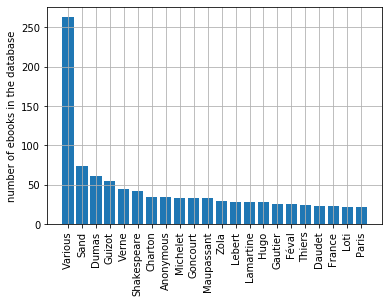

In [156]:
plt.bar(my_list_of_authors[my_list_of_authors>20].index,my_list_of_authors[my_list_of_authors>20])
plt.xticks(rotation='vertical')
plt.ylabel('number of ebooks in the database')
plt.grid(True)

In [225]:
#from what period?
# we have to clean the birth date period

my_clean_birth_list=[int(str(my_birth_date)[1:]) if str(my_birth_date)[1:].isnumeric() else None for my_birth_date in french_book_list["author_birth_year"]]
my_clean_death_list=[int(str(my_death_date)[0:4]) if str(my_death_date)[1:].isnumeric() else None for my_death_date in french_book_list["author_death_year"]]

56 1954 1825.0 (3127,)


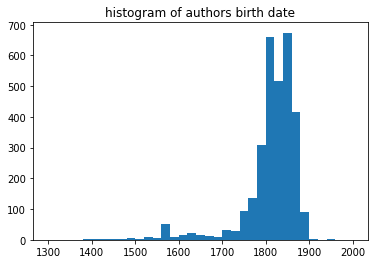

In [217]:
A=np.array(my_clean_birth_list)
plt.hist(A[A!=None],35,range=[1300, 2000])
plt.title("histogram of authors birth date")
print(np.min(A[A!=None]), np.max(A[A!=None]), np.median(A[A!=None]), A[A!=None].shape)

104 1985 1887.0 (3345,)


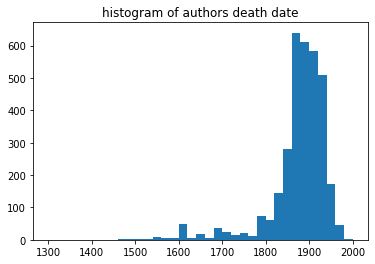

In [226]:
A=np.array(my_clean_death_list)
plt.hist(A[A!=None],35,range=[1300, 2000])
plt.title("histogram of authors death date")
print(np.min(A[A!=None]), np.max(A[A!=None]), np.median(A[A!=None]), A[A!=None].shape)

In [227]:
french_book_list["clean_birth_year"]=np.array(my_clean_birth_list)
french_book_list["clean_death_year"]=np.array(my_clean_death_list)

In [229]:
french_book_list=french_book_list.drop(['author_birth_year','author_death_year'], axis=1)

In [230]:
french_book_list.head(3)

,author_code,ebook_link,ebook_title,other_info,other_info.1,other_info.2,other_info.3,other_info.4,other_info.5,author_Name,author_Surname,clean_birth_year,clean_death_year
0,a8269,/ebooks/18812,Douze ans de séjour dans la Haute-Éthiopie,NaN,NaN,NaN,NaN,NaN,NaN,Abbadie,Arnauld d',1815,None
1,a5182,/ebooks/18092,Germaine,NaN,NaN,NaN,NaN,NaN,NaN,About,Edmond,1828,1885
2,a5182,/ebooks/22813,Heath's Modern Language Series: La Mère de la ...,NaN,NaN,NaN,NaN,NaN,NaN,About,Edmond,1828,1885


In [247]:
my_century_list=[None if my_birth==None else int(str(my_birth+30)[0:2])+1 if len(str(my_birth+30))==4 else int(str(my_birth+30)[0:1])+1 if len(str(my_birth+30))==3  else 1 for my_birth in french_book_list['clean_birth_year']]
    

In [248]:
french_book_list["century"]=np.array(my_century_list)

In [249]:
french_book_list.groupby(by='century').count().iloc[:,0]

century
1        3
15       8
16      68
17      81
18     214
19    2539
20     214
Name: author_code, dtype: int64

In [262]:
#create the link to the .txt book
# example: http://www.gutenberg.org/cache/epub/18812/pg18812.txt
_,_,french_book_list['link']=french_book_list['ebook_link'].str.split('/',2).str


In [265]:
french_book_list['link_txt']=['http://www.gutenberg.org/cache/epub/'+str(my_link)+'/pg'+str(my_link)+'.txt' for my_link in french_book_list['link']]

In [266]:
french_book_list.head(3)

,author_code,ebook_link,ebook_title,other_info,other_info.1,other_info.2,other_info.3,other_info.4,other_info.5,author_Name,author_Surname,clean_birth_year,clean_death_year,century,link,link_txt
0,a8269,/ebooks/18812,Douze ans de séjour dans la Haute-Éthiopie,NaN,NaN,NaN,NaN,NaN,NaN,Abbadie,Arnauld d',1815,None,19,18812,http://www.gutenberg.org/cache/epub/18812/pg18...
1,a5182,/ebooks/18092,Germaine,NaN,NaN,NaN,NaN,NaN,NaN,About,Edmond,1828,1885,19,18092,http://www.gutenberg.org/cache/epub/18092/pg18...
2,a5182,/ebooks/22813,Heath's Modern Language Series: La Mère de la ...,NaN,NaN,NaN,NaN,NaN,NaN,About,Edmond,1828,1885,19,22813,http://www.gutenberg.org/cache/epub/22813/pg22...


In [267]:
french_book_list=french_book_list.drop(['link'], axis=1)

In [268]:
french_book_list.to_csv('french_books_list_3.csv')